In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Leemos la data
url=r'C:\Users\andre\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv'
df=pd.read_csv(url)

In [3]:
#Hacemos que se vean rodas las columnas
pd.set_option('display.max_columns', None)

FAVC:" Do you eat high caloric food frequently? "

FCVC:" Do you usually eat vegetables in your meals? "

NCP:" How many main meals do you have daily? "

CAEC:" Do you eat any food between meals? "

SMOKE:" Do you smoke? "

CH2O:" How much water do you drink daily? "

SCC:" Do you monitor the calories you eat daily? "

FAF:" How often do you have physical activity? "

TUE:" How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

CALC :" How often do you drink alcohol? "

MTRANS:" Which transportation do you usually use?

In [4]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
#Miramos tanto sus dtypes como si tiene nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [6]:
#Miramos si tiene datos nulos
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### **Limpieza**

In [7]:
#Quitamos las mayusculas 
df.columns=df.columns.str.lower()

In [8]:
#Cambiamos los nombres de dos columnas "family_history_with_overweight" y "nobeyesdad"
df=df.rename(columns={"family_history_with_overweight": "family_history", "nobeyesdad": "obesity_level"})

### **EDA**

In [9]:
#calculamos la proporción de cada uno de los géneros
gender=df['gender'].value_counts(normalize=True)

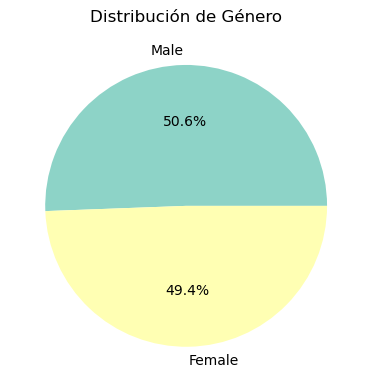

In [10]:
#creamos gráfico circular para mostrar la proporción de géneros
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1) 
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribución de Género')
plt.show()

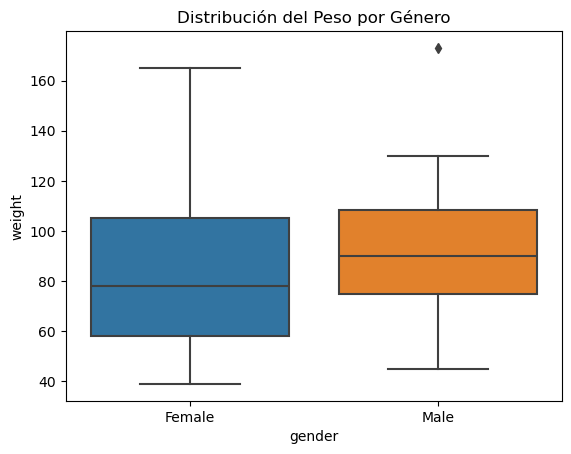

In [11]:
# Distribución del Peso por Género
sns.boxplot(data=df, x='gender', y='weight')
plt.title('Distribución del Peso por Género')
plt.show()

c:\Users\andre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


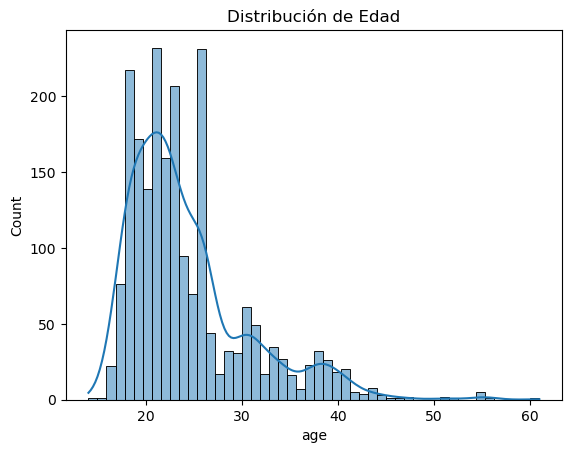

In [12]:
# Distribución de Edad
sns.histplot(data=df, x='age', kde=True)
plt.title('Distribución de Edad')
plt.show()

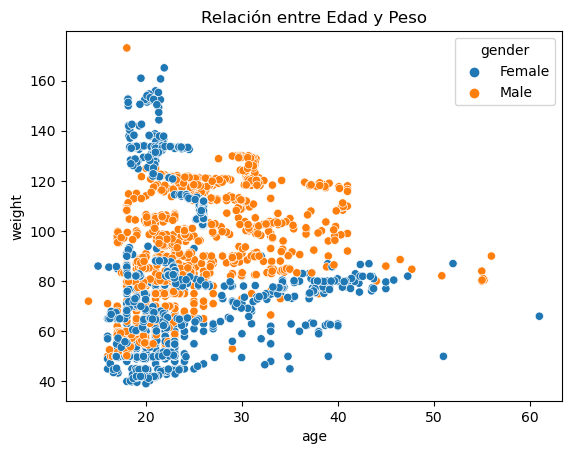

In [13]:
# Relación entre Edad y Peso
sns.scatterplot(data=df, x='age', y='weight', hue='gender')
plt.title('Relación entre Edad y Peso')
plt.show()

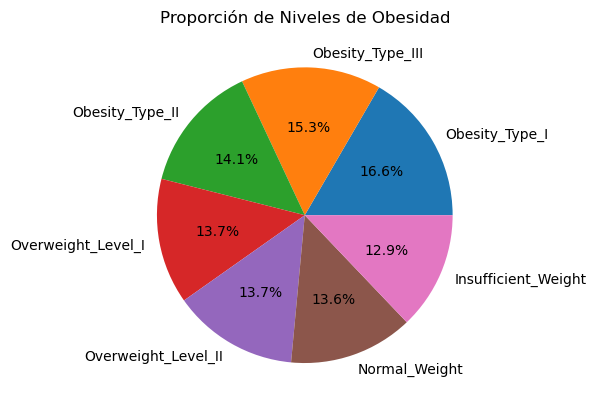

In [14]:
# Proporción de Niveles de Obesidad
df['obesity_level'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proporción de Niveles de Obesidad')
plt.ylabel('')
plt.show()

In [15]:
#Calculo el índice de masa corporal (IMC) por nivel de obesidad
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2

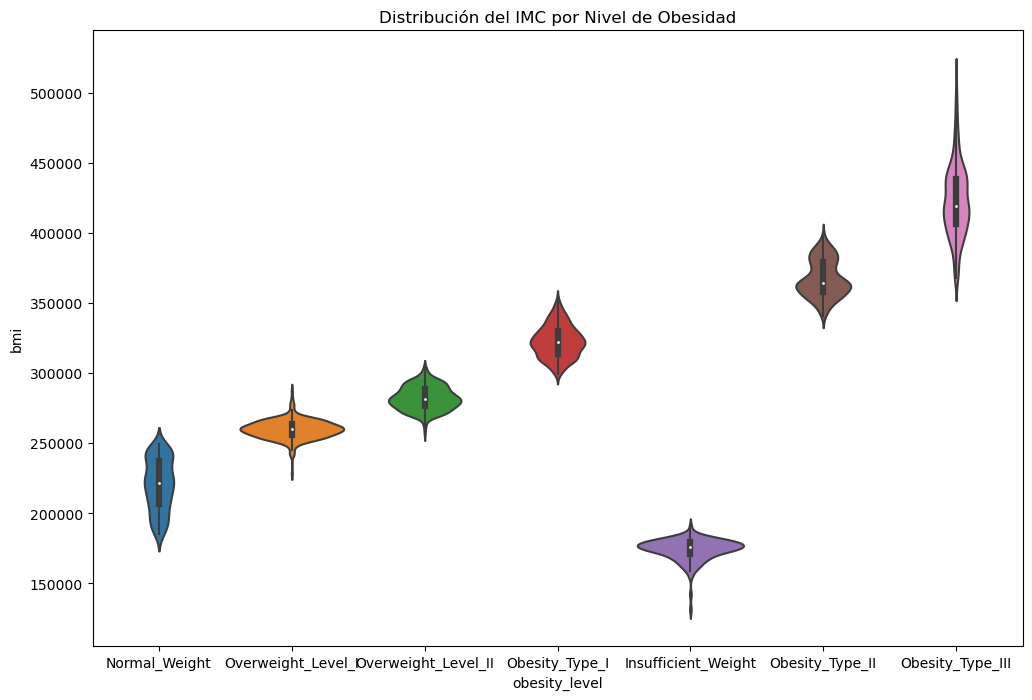

In [18]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='obesity_level', y='bmi')
plt.title('Distribución del IMC por Nivel de Obesidad')
plt.show()

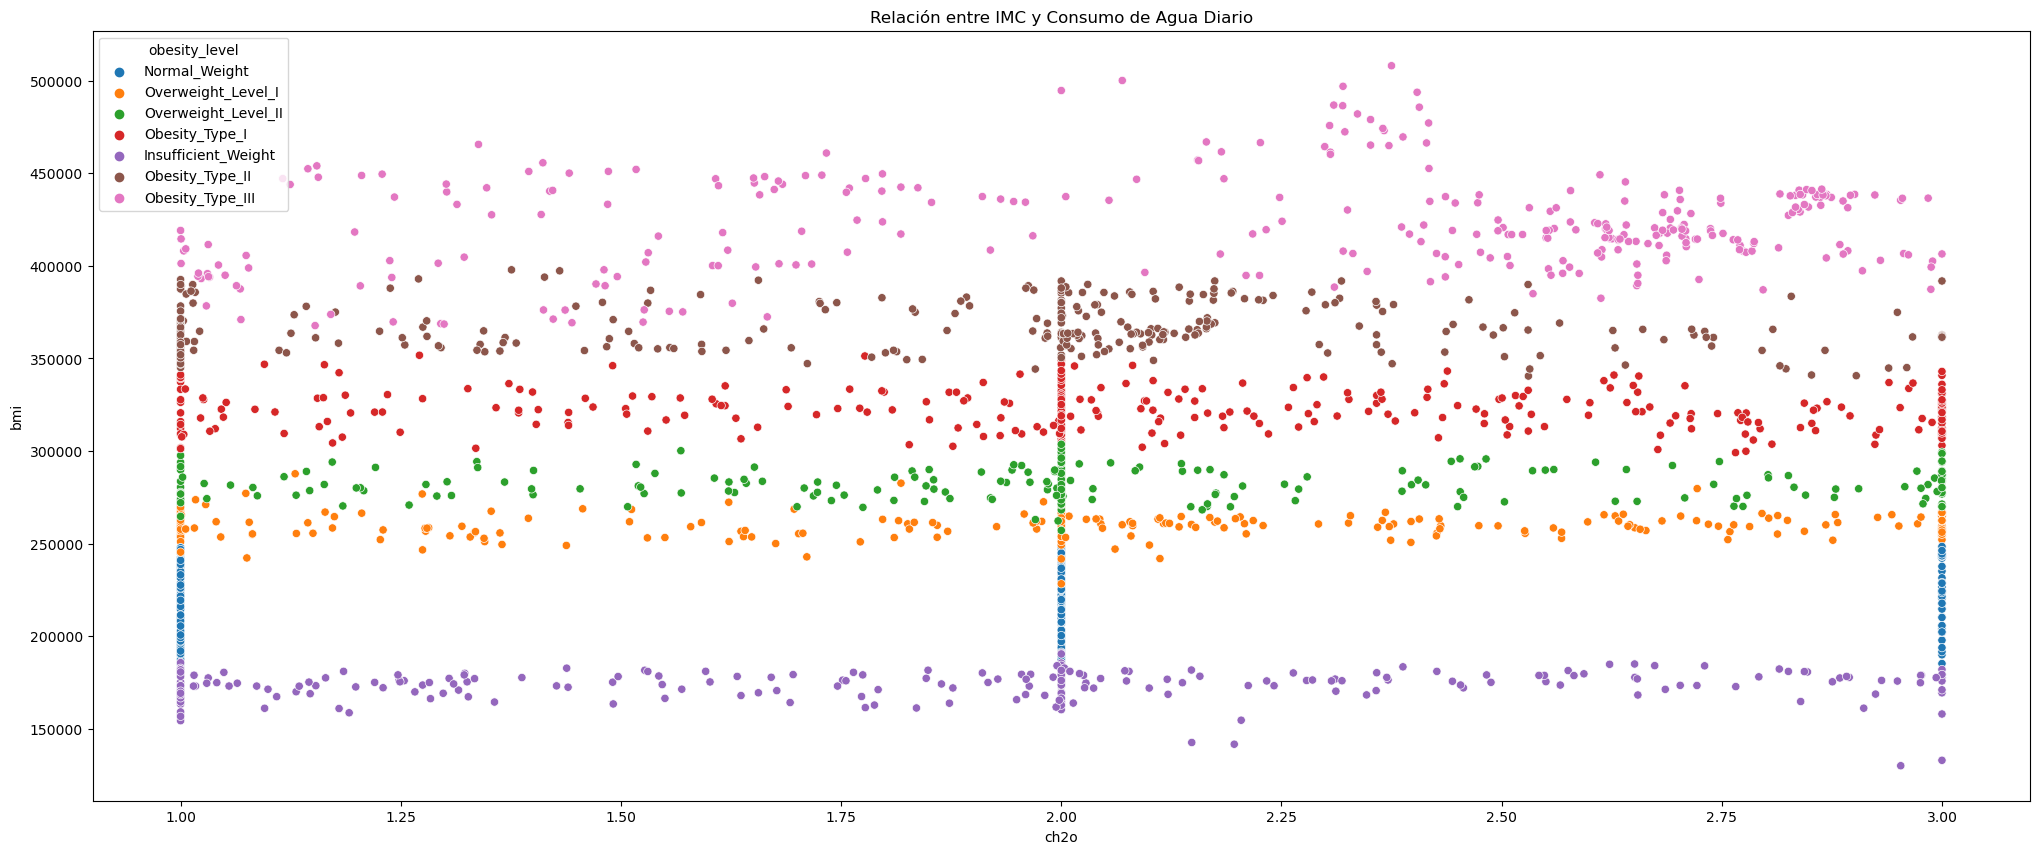

<Figure size 3000x1200 with 0 Axes>

In [19]:
plt.figure(figsize=(25, 10))
sns.scatterplot(data=df, x='ch2o', y='bmi', hue='obesity_level')
plt.title('Relación entre IMC y Consumo de Agua Diario')
plt.figure(figsize=(30, 12))
plt.show()